In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA

# multicollinerity

In [2]:
data = pd.read_csv('./data/processed_data_120.csv')
data.drop(columns=['target_sunspots'], inplace=True)
data

,sunspots,dates,year,month,lag_1_sunspots,lag_2_sunspots,lag_3_sunspots,lag_4_sunspots,lag_5_sunspots,lag_6_sunspots,...,lag_36_sunspots,avg_3_sunspots,avg_6_sunspots,avg_12_sunspots,avg_24_sunspots,avg_36_sunspots,roll_max_sunspots,roll_min_sunspots,roll_avg_sunspots,target_dates
0,35.0,1752-01-31,1752,1,44.0,28.5,23.2,23.5,59.8,66.3,...,58.0,35.833333,35.666667,44.741667,63.929167,70.019444,158.6,23.2,69.694595,1762-01-31
1,50.0,1752-02-29,1752,2,35.0,44.0,28.5,23.2,23.5,59.8,...,62.6,43.000000,34.033333,45.283333,62.850000,69.669444,158.6,23.2,69.176316,1762-02-28
2,71.0,1752-03-31,1752,3,50.0,35.0,44.0,28.5,23.2,23.5,...,70.0,52.000000,41.950000,47.425000,62.091667,69.697222,158.6,23.2,69.223077,1762-03-31
3,59.3,1752-04-30,1752,4,71.0,50.0,35.0,44.0,28.5,23.2,...,55.7,60.100000,47.966667,47.666667,60.883333,69.797222,158.6,23.2,68.975000,1762-04-30
4,59.7,1752-05-31,1752,5,59.3,71.0,50.0,35.0,44.0,28.5,...,85.0,63.333333,53.166667,47.583333,59.620833,69.094444,158.6,23.2,68.748780,1762-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,25.6,1973-08-31,1973,8,23.1,39.5,42.4,57.7,46.0,42.9,...,93.0,29.400000,39.050000,44.400000,58.129167,64.233333,253.8,0.0,49.941914,1983-08-31
2660,59.3,1973-09-30,1973,9,25.6,23.1,39.5,42.4,57.7,46.0,...,99.5,36.000000,41.266667,44.008333,58.508333,63.116667,253.8,0.0,49.945384,1983-09-30
2661,30.7,1973-10-31,1973,10,59.3,25.6,23.1,39.5,42.4,57.7,...,86.6,38.533333,36.766667,41.458333,57.633333,61.563889,253.8,0.0,49.938251,1983-10-31
2662,23.9,1973-11-30,1973,11,30.7,59.3,25.6,23.1,39.5,42.4,...,95.2,37.966667,33.683333,39.983333,55.995833,59.583333,253.8,0.0,49.928603,1983-11-30


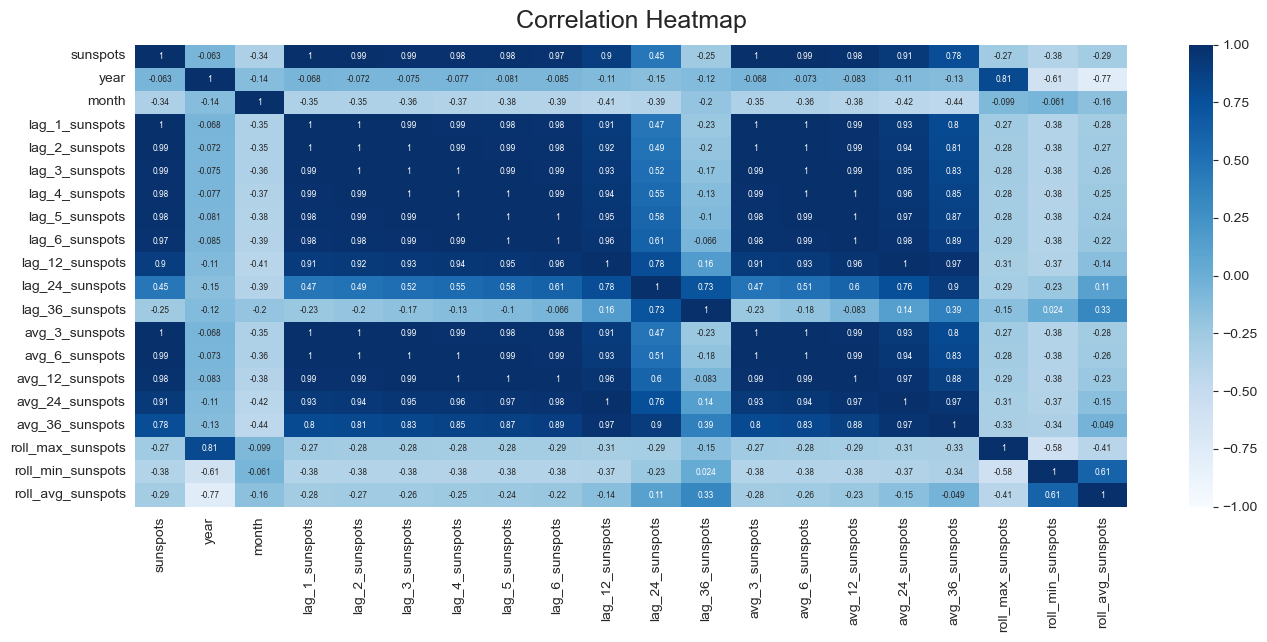

In [3]:
corr = data.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr,dtype=np.bool_))
plt.figure(figsize=(16, 6))
heatmap1 = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 6},cmap='Blues')
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

# correlation


In [4]:
corrs = []
for i in range(120, 133):
    data = pd.read_csv(f'./data/processed_data_{i}.csv')
    corr = data.corr(numeric_only=True)[['target_sunspots']]
    corr['m'] = i
    corrs.append(corr)
corrs = pd.concat(corrs)
corrs = corrs.reset_index()
corrs.rename(columns={'index':'x_name'}, inplace=True)
corrs

,x_name,target_sunspots,m
0,sunspots,0.560943,120
1,year,0.161305,120
2,month,0.010890,120
3,lag_1_sunspots,0.568709,120
4,lag_2_sunspots,0.575656,120
...,...,...,...
268,avg_36_sunspots,0.324843,132
269,roll_max_sunspots,-0.071949,132
270,roll_min_sunspots,-0.021646,132
271,roll_avg_sunspots,-0.221803,132


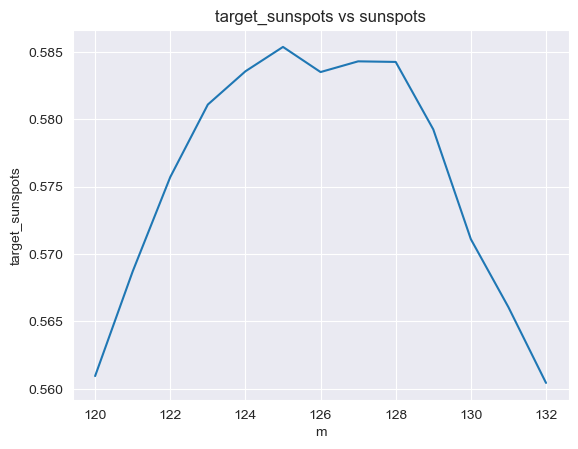

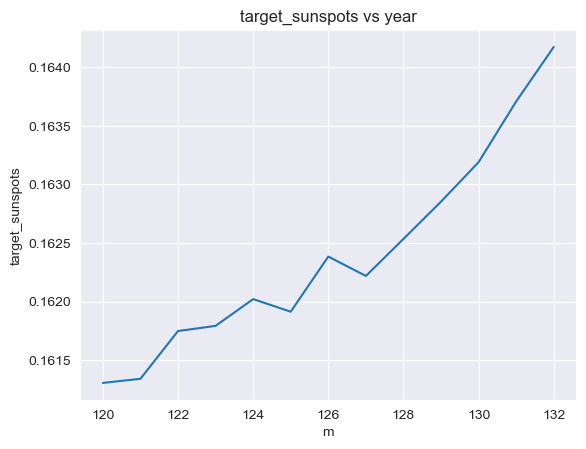

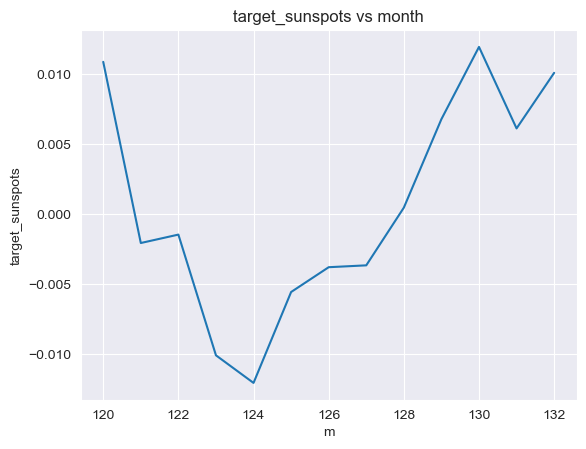

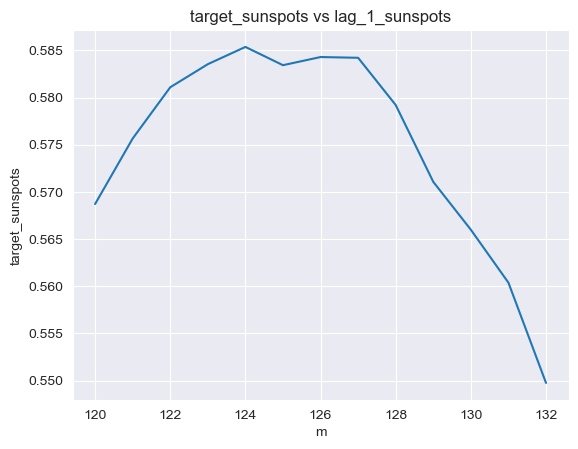

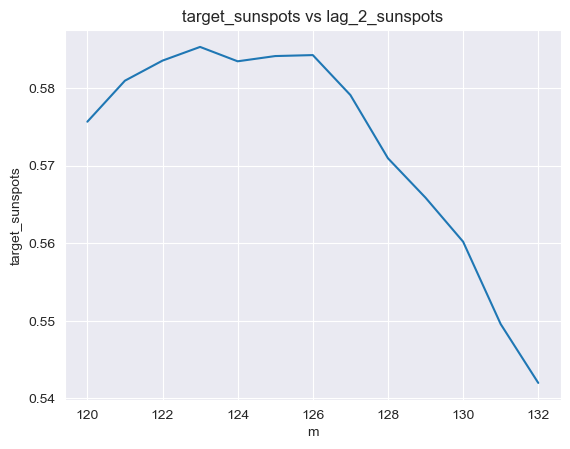

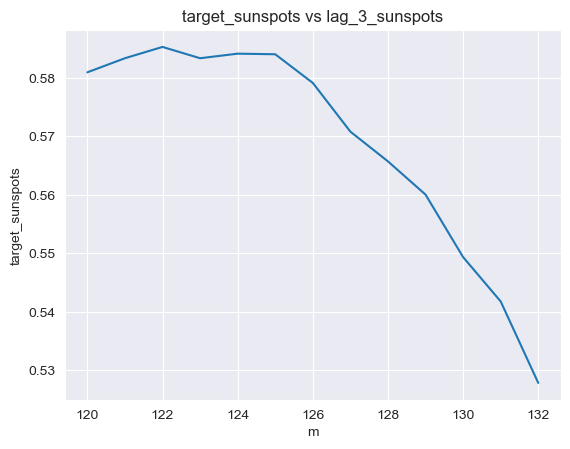

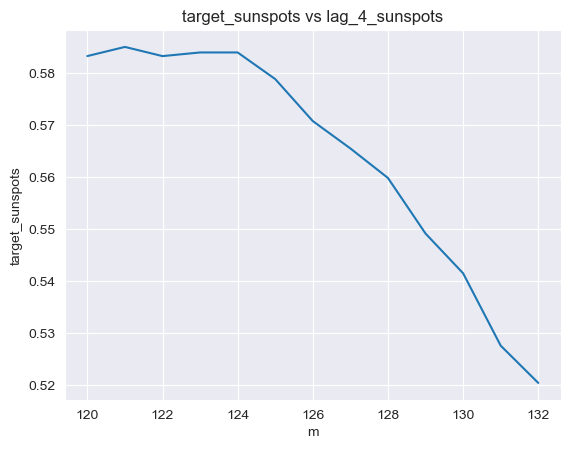

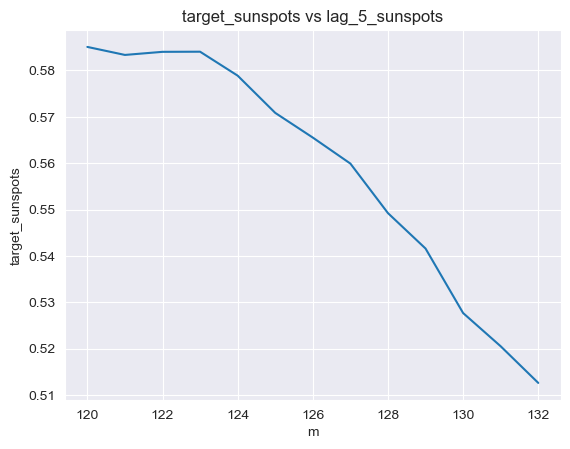

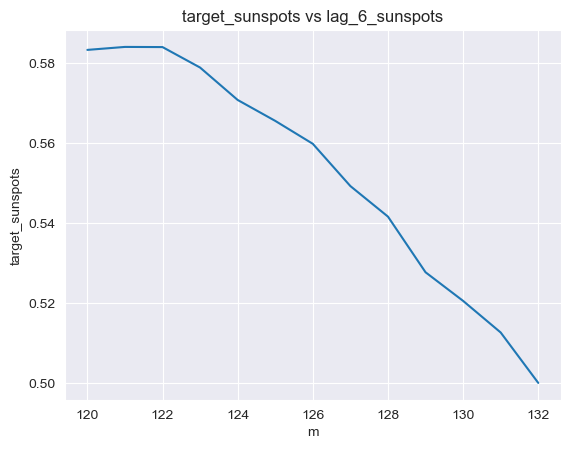

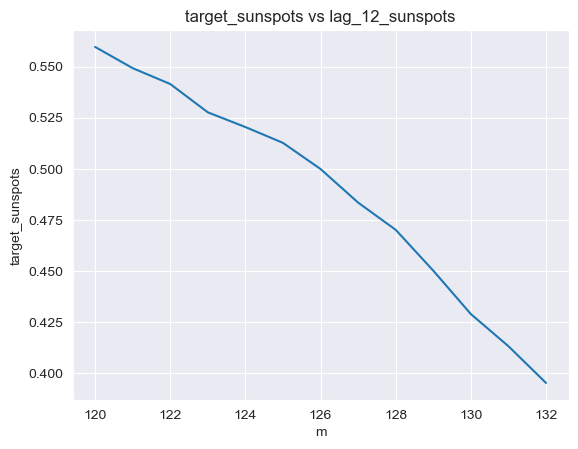

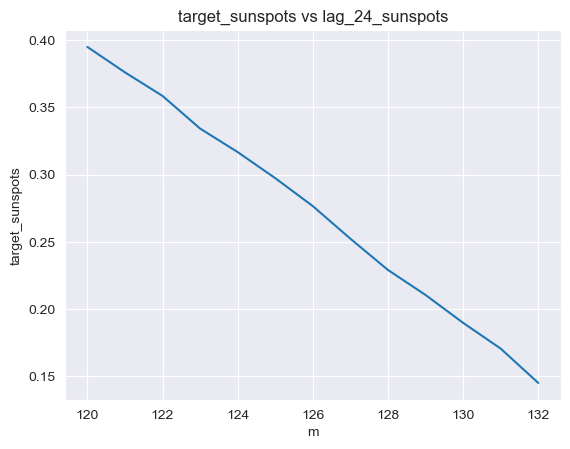

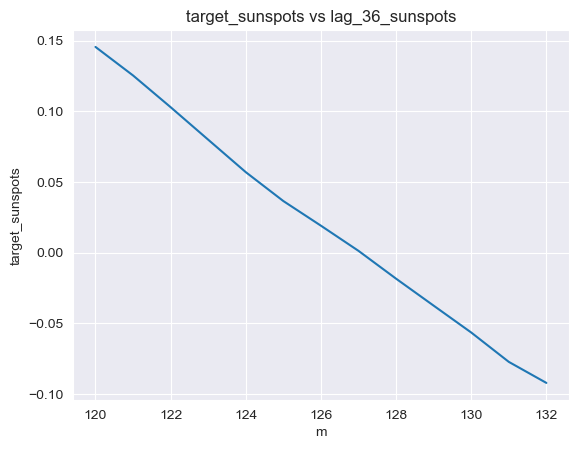

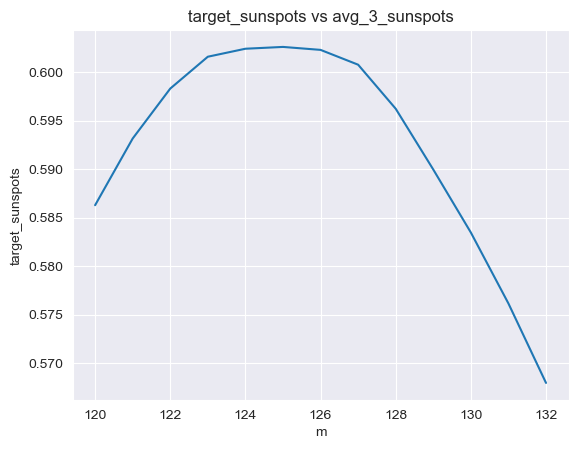

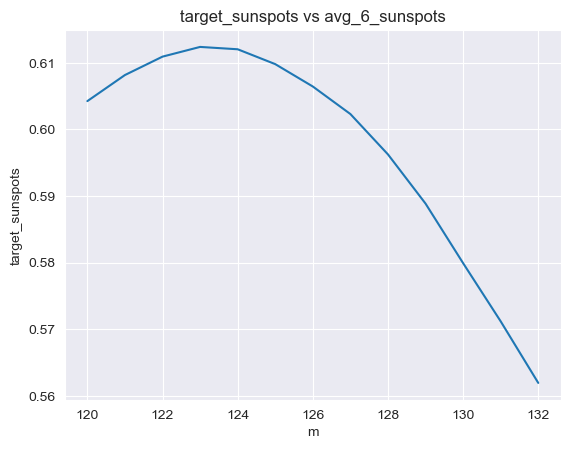

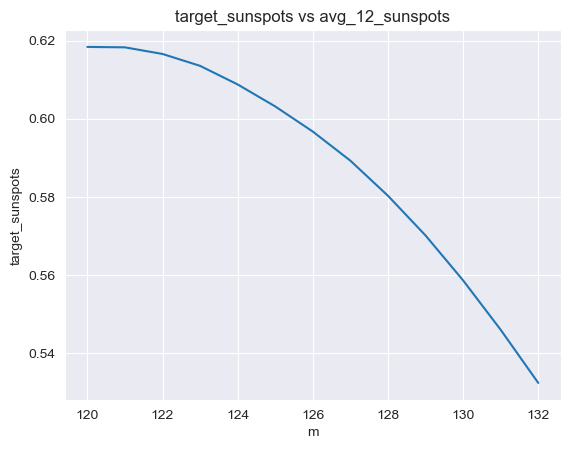

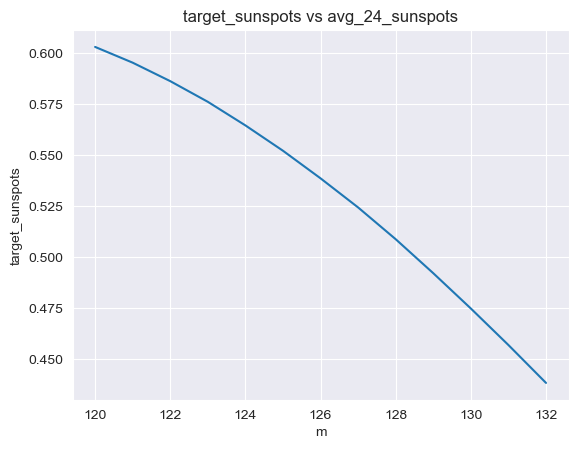

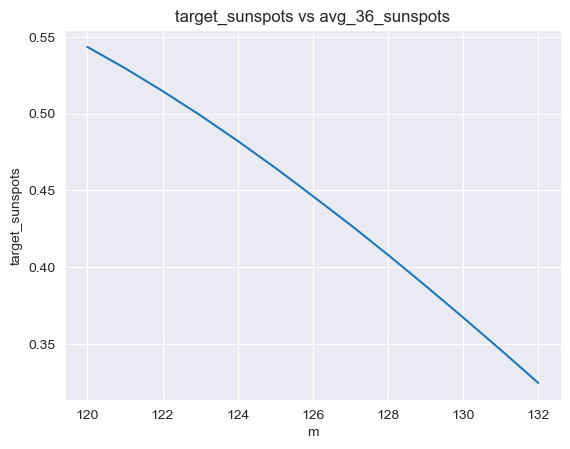

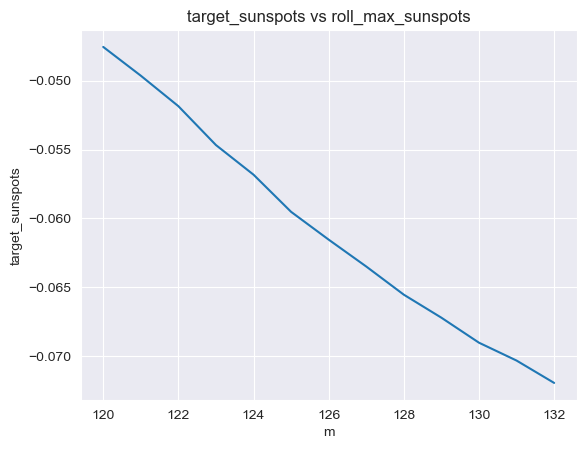

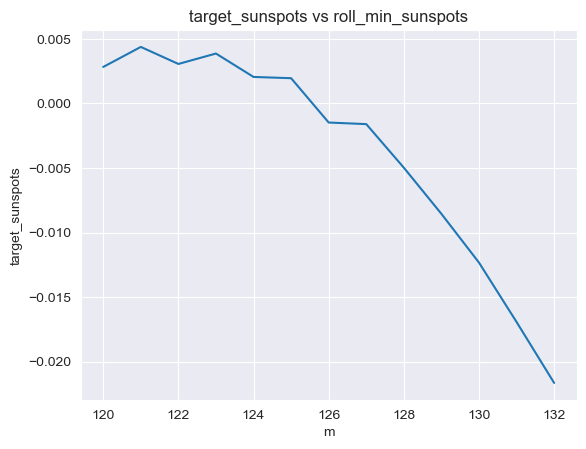

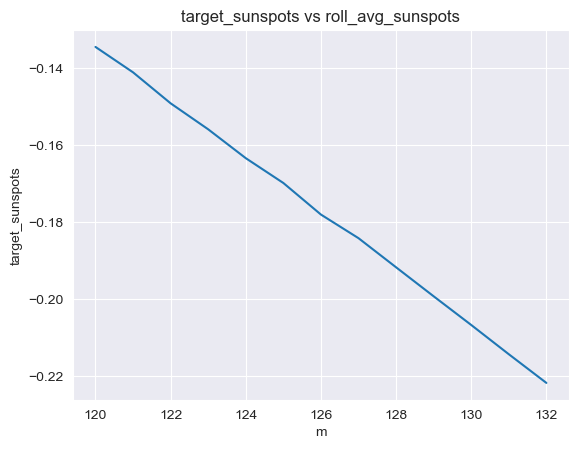

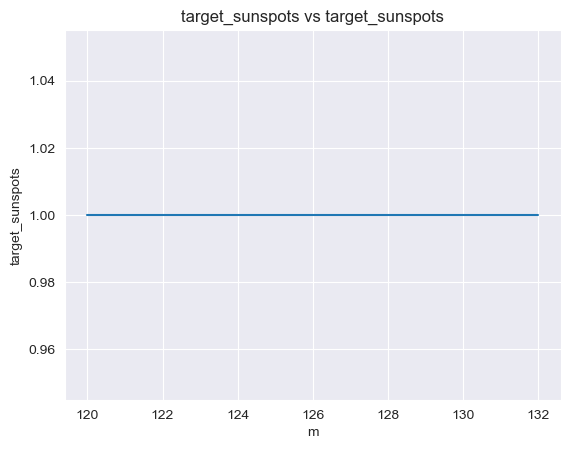

In [5]:
for x_name in corrs.x_name.unique():
    plt.clf()
    sns.lineplot(data=corrs[corrs['x_name'] == x_name], x='m', y='target_sunspots').set_title(label=f"target_sunspots vs {x_name}")
    plt.show()

<Axes: xlabel='x_name', ylabel='target_sunspots'>

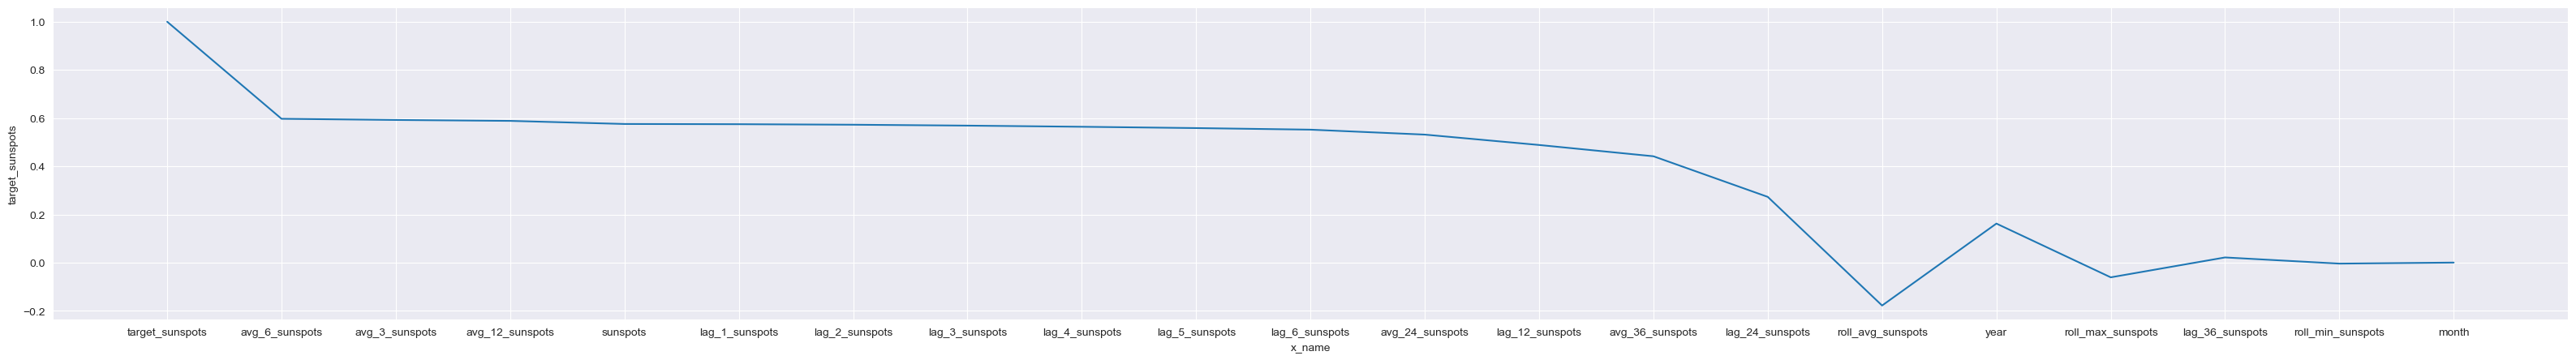

In [6]:
plt.figure(figsize=(40, 5))
avg_corrs = corrs.groupby(['x_name']).agg({'target_sunspots':'mean'}).reset_index()
avg_corrs['abs'] = np.abs(avg_corrs['target_sunspots'])
avg_corrs = avg_corrs.sort_values(by=['abs'], ascending=False)
sns.lineplot(data=avg_corrs, x='x_name', y='target_sunspots')

<Axes: xlabel='x_name', ylabel='target_sunspots'>

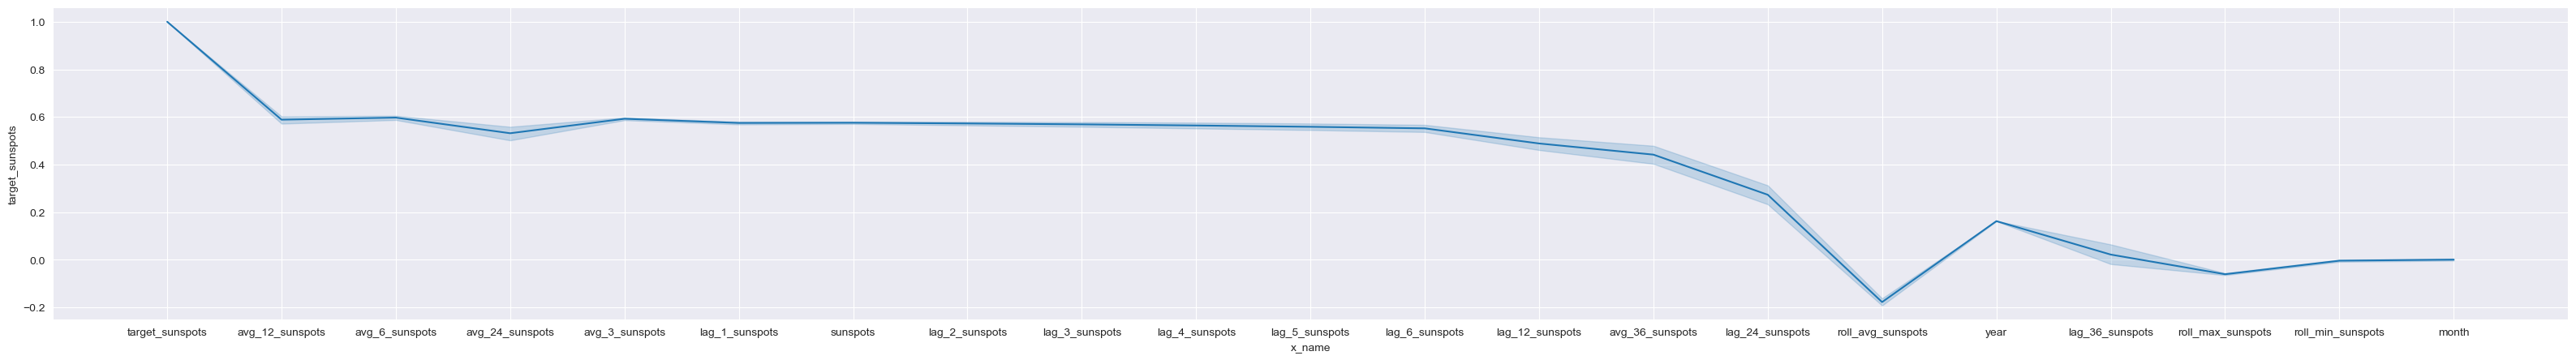

In [7]:
plt.figure(figsize=(40, 5))
corrs['abs'] = np.abs(corrs['target_sunspots'])
corrs = corrs.sort_values(by=['abs'], ascending=False)
sns.lineplot(data=corrs, x='x_name', y='target_sunspots')

# onehot

In [14]:
j = 120
data = pd.read_csv(f'./data/processed_data_{j}.csv')
month_encoder = OneHotEncoder()
month_encoder.fit(data[['month']])
month = month_encoder.transform(data[['month']]).toarray()
month = pd.DataFrame(month, columns=[str(x) for x in month_encoder.categories_[0].tolist()])
data:pd.DataFrame = pd.concat([data, month], axis = 1)
data_temp = data[['dates', 'target_dates', 'target_sunspots']].copy(deep=True)
data.drop(columns=['dates', 'target_dates', 'target_sunspots', 'month'], inplace=True)
data

,sunspots,year,lag_1_sunspots,lag_2_sunspots,lag_3_sunspots,lag_4_sunspots,lag_5_sunspots,lag_6_sunspots,lag_12_sunspots,lag_24_sunspots,...,3,4,5,6,7,8,9,10,11,12
0,35.0,1752,44.0,28.5,23.2,23.5,59.8,66.3,70.0,73.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1752,35.0,44.0,28.5,23.2,23.5,59.8,43.5,75.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,1752,50.0,35.0,44.0,28.5,23.2,23.5,45.3,89.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59.3,1752,71.0,50.0,35.0,44.0,28.5,23.2,56.4,88.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.7,1752,59.3,71.0,50.0,35.0,44.0,28.5,60.7,90.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,25.6,1973,23.1,39.5,42.4,57.7,46.0,42.9,76.8,61.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2660,59.3,1973,25.6,23.1,39.5,42.4,57.7,46.0,64.0,50.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2661,30.7,1973,59.3,25.6,23.1,39.5,42.4,57.7,61.3,51.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2662,23.9,1973,30.7,59.3,25.6,23.1,39.5,42.4,41.6,63.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
data.shape

(2664, 31)

In [17]:
# kernel PCA with default hyperparameter values
kernel_pca = KernelPCA(
    n_components=None, kernel="linear", gamma=None, fit_inverse_transform=True, alpha=1.0
)
kernel_pca_data = kernel_pca.fit_transform(data)
kernel_pca_data

array([[-1.98084036e+01,  1.12480474e+02,  7.26794936e+01, ...,
        -9.36611252e-02,  1.06632430e-01,  6.23020799e-01],
       [-2.94427185e+01,  1.12072891e+02,  6.82814647e+01, ...,
        -3.71114810e-01, -3.19511410e-01, -1.01396946e-01],
       [-1.79458246e+01,  1.12086893e+02,  7.08483534e+01, ...,
         1.60669883e-01,  3.25920683e-01,  4.42496430e-01],
       ...,
       [-7.66775270e+00, -1.21064800e+02,  1.83961457e+01, ...,
        -2.36462825e-01,  8.69443317e-02, -1.73471171e-01],
       [-2.17123739e+01, -1.24793935e+02,  2.81839078e+01, ...,
         1.91247758e-01,  2.38442077e-04,  1.75424557e-01],
       [-2.88590260e+01, -1.26458242e+02,  3.47073497e+01, ...,
        -2.98034895e-02, -1.86553833e-01, -7.64951171e-02]])

# PCA

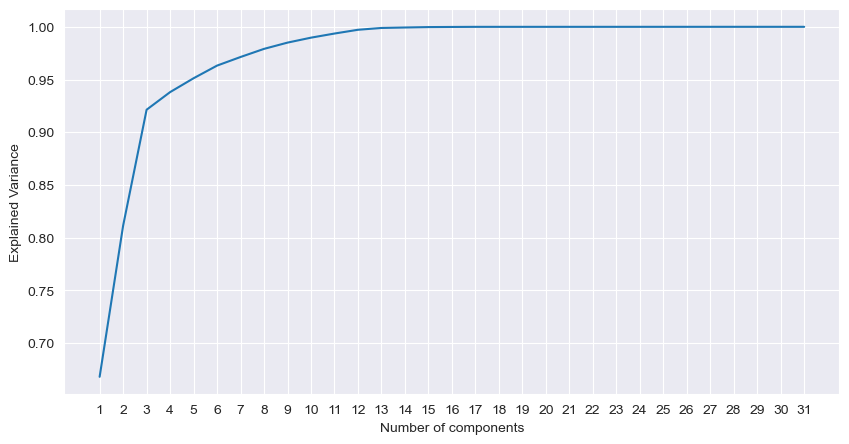

In [10]:
n = data.shape[1]
pca = PCA(n)
pca_data = pca.fit_transform(data)
eigenvalues = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, n+1), eigenvalues[:n].cumsum())
plt.xticks(range(1, n+1))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [11]:
# n=3 is best
n = 3
pca = PCA(n)
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=['x1', 'x2', 'x3'])
pca_data = pd.concat([pca_data, data_temp], axis=1)
pca_data

,x1,x2,x3,dates,target_dates,target_sunspots
0,-19.808404,112.480474,72.679494,1752-01-31,1762-01-31,43.8
1,-29.442719,112.072891,68.281465,1752-02-29,1762-02-28,72.8
2,-17.945825,112.086893,70.848353,1752-03-31,1762-03-31,45.7
3,-2.484805,116.783005,57.508119,1752-04-30,1762-04-30,60.2
4,13.230970,113.926057,73.838253,1752-05-31,1762-05-31,39.9
...,...,...,...,...,...,...
2659,-1.707244,-123.848628,33.944091,1973-08-31,1983-08-31,71.8
2660,-0.279631,-122.169889,24.898873,1973-09-30,1983-09-30,50.3
2661,-7.667753,-121.064800,18.396146,1973-10-31,1983-10-31,55.8
2662,-21.712374,-124.793935,28.183908,1973-11-30,1983-11-30,33.3


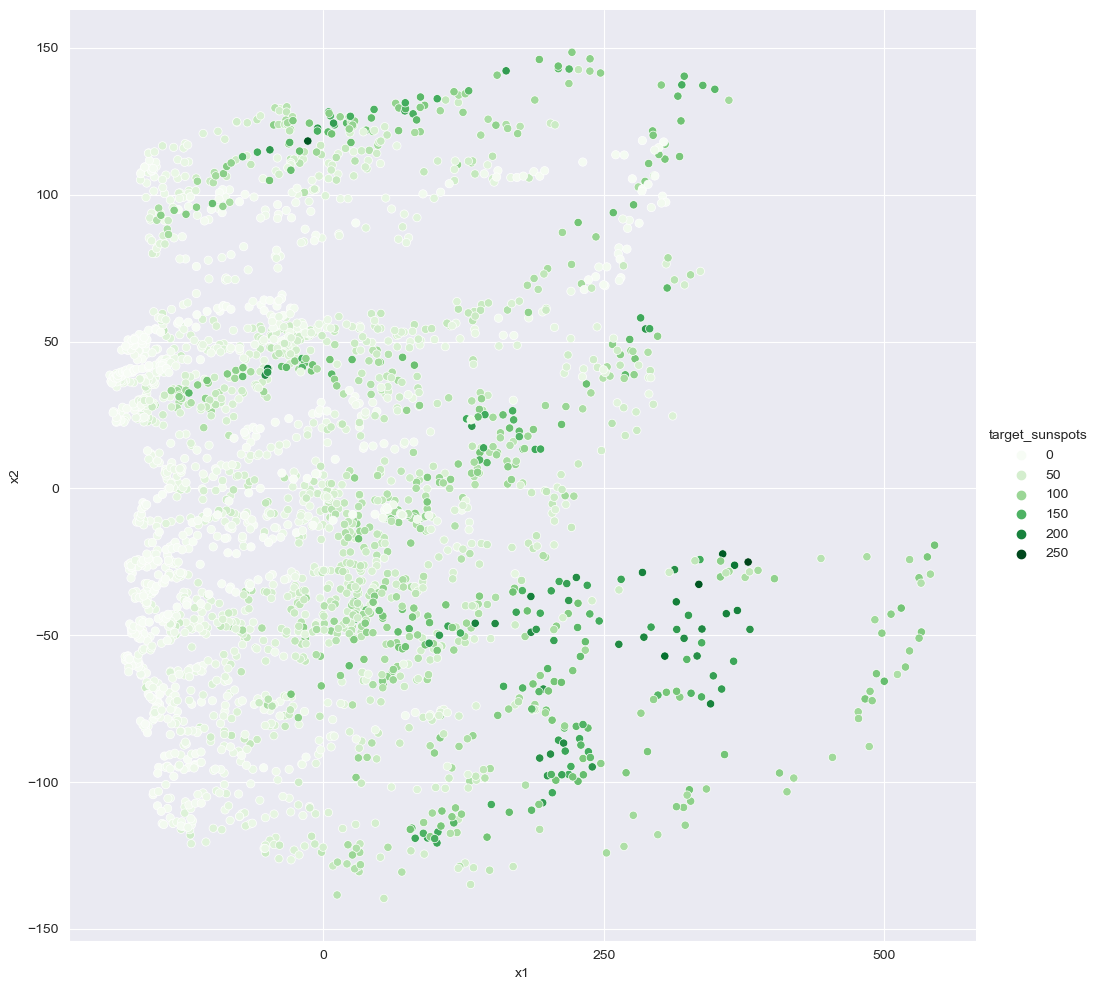

In [12]:
g=sns.relplot(x='x1',y='x2',data=pca_data,
            palette='Greens',
            height=10,
            # style='class',
            hue='target_sunspots',
            # size='sepal length(cm)',
            sizes=(50, 200),
            # col='class',#按变量分图绘制散点图
           )


sns.set(style='darkgrid', font='sans-serif', font_scale=4,)

# store pca data

In [13]:
for j in range(120, 133):
    data = pd.read_csv(f'./data/processed_data_{j}.csv')
    month = month_encoder.transform(data[['month']]).toarray()
    month = pd.DataFrame(month, columns=[str(x) for x in month_encoder.categories_[0].tolist()])
    data:pd.DataFrame = pd.concat([data, month], axis = 1)
    data_temp = data[['dates', 'target_dates', 'target_sunspots']].copy(deep=True)
    data.drop(columns=['dates', 'target_dates', 'target_sunspots', 'month'], inplace=True)
    n = 3
    pca = PCA(n)
    pca_data = pca.fit_transform(data)
    pca_data = pd.DataFrame(pca_data, columns=['x1', 'x2', 'x3'])
    pca_data = pd.concat([pca_data, data_temp], axis=1)
    pca_data.to_csv(f'./data/pca_data_{j}.csv', index=False)